### How do different shuffles compare to each other? 

In [2]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.pseudo_decoding.single_selected_feature_configs import *
import scipy
import argparse
import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
args = argparse.Namespace(
    **SingleSelectedFeatureConfigs()._asdict()
)
args.trial_event = "FeedbackOnsetLong"
args.beh_filters = {"PreferredChosen": True}
all_res = []
for shuffle_method in ["circular_shift", "random", "session_permute"]:
    args.shuffle_method = shuffle_method
    res = io_utils.read_selected_features(args, FEATURES, conds=["pref"])
    res = res[res.condition == "pref_shuffle"]
    res["condition"] = shuffle_method
    all_res.append(res)
all_res = pd.concat(all_res)

Warning, shuffle not found: RIPPLE_pref_shuffle_9


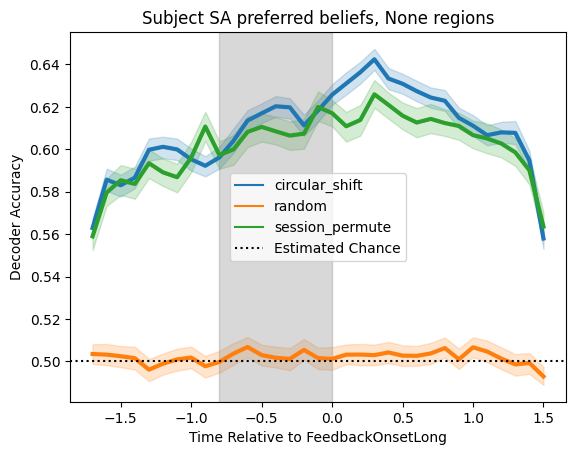

In [9]:
fig, ax = plt.subplots()
visualization_utils.visualize_preferred_beliefs(args, all_res, ax)